<a href="https://colab.research.google.com/github/ykitaguchi77/Laboratory_course/blob/master/14.%20YOLO%E3%82%92%E7%94%A8%E3%81%84%E3%81%9F%E7%89%A9%E4%BD%93%E6%A4%9C%E7%9F%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv5を用いた物体検出
GPU使用推奨

https://github.com/ultralytics/yolov5

In [ ]:
import os
!git clone https://github.com/ultralytics/yolov5  # clone
os.chdir("/content/yolov5")
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.11 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (11858/11858), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 43.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-1-27 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 398MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 1884.2ms pre-process, 112.2ms inference, 1193.2ms NMS per image at shape (1, 3, 384, 640)


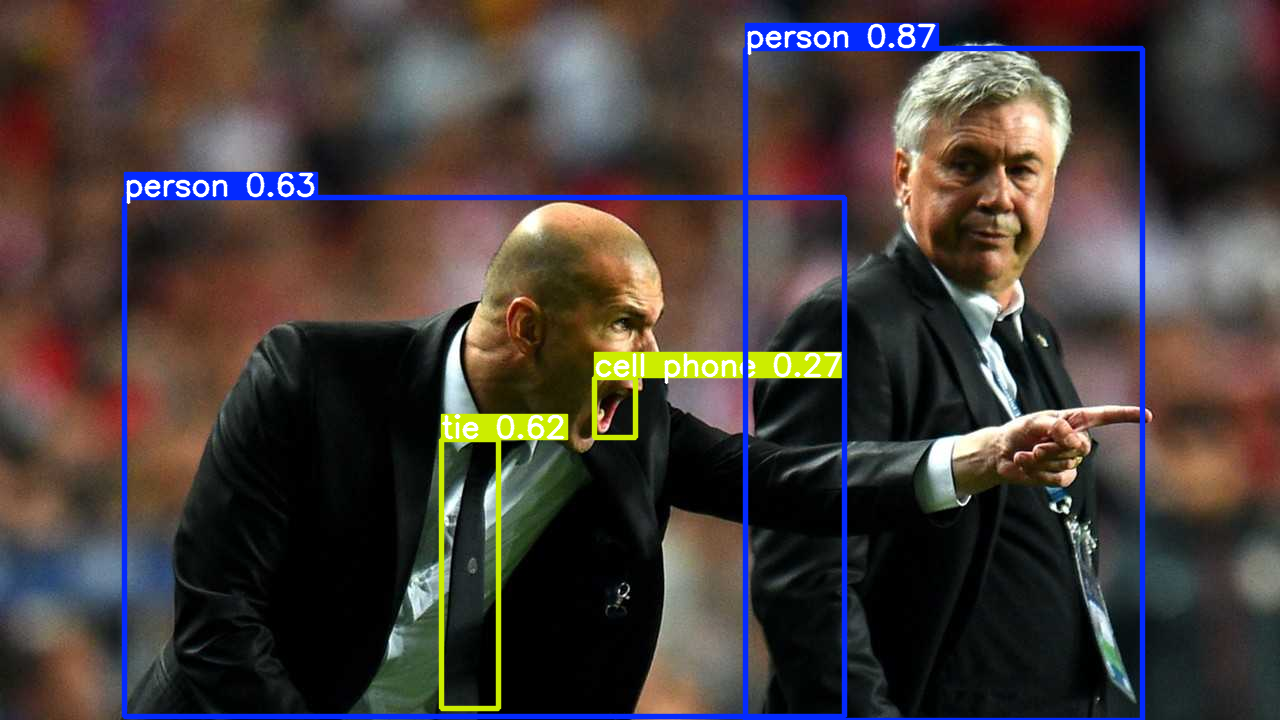

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # or yolov5n - yolov5x6, custom

# Images
img = ['https://ultralytics.com/images/zidane.jpg']  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
results.show()

In [ ]:
# 座標
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,745.578735,48.470276,1142.694336,720.000000,0.868910,0,person
1,124.744080,197.334503,844.397644,716.650513,0.630325,0,person
2,441.238708,439.350616,498.380737,708.570923,0.616793,27,tie
3,594.081787,377.300354,635.423950,437.147827,0.274014,67,cell phone


In [ ]:
# 信頼度
results.pandas().xyxy[0].confidence

0    0.879861
1    0.675118
2    0.666694
3    0.261517
Name: confidence, dtype: float64

In [ ]:
# 画像を表示
results.show()

In [ ]:
# 画像をクロップ
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

cropped_image = results.crop()[1]['im']
cropped_image = cropped_image[:,:,::-1] #BGR to RGB https://qiita.com/ikanamazu/items/3e6337fa2c477992ee8d
#貼り付け
plt.imshow(cropped_image)
#表示
plt.show()

#手持ちの画像で物体検知

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('/content/gdrive/MyDrive/Deep_learning/Face_Images/1546_7.jpg'))

In [ ]:
# Images
img = ['/content/gdrive/My Drive/AI_laboratory_course/bokujyou.jpg']  # or file, Path, PIL, OpenCV, numpy, list


# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
results.show()

In [ ]:
import requests
from PIL import Image
import io

# URL of the image
url = 'https://www.keikyu-exinn.co.jp/hotel/haneda/img/access/shuttlebus.jpg'

# Define the directory to save the image
save_directory = '/content/'
filename = url.split('/')[-1]
full_path = save_directory + filename

# Send a GET request to the URL and save the image
response = requests.get(url)
if response.status_code == 200:
    # Method 1: Save to disk first
    with open(full_path, 'wb') as f:
        f.write(response.content)

    # Now you can use the model
    results = model(full_path)

    # Alternative Method 2: Use the image directly from memory
    # image = Image.open(io.BytesIO(response.content))
    # results = model(image)  # If your model accepts PIL Image objects

    # Results
    results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
    results.show()
else:
    print(f"Failed to download image. Status code: {response.status_code}")

# **動画を判定してみよう**

### 動画のダウンロード

In [ ]:
!pip install youtube-dl
!pip install yt-dlp
!pip install ffmpeg
#!python -m pip install -U yt-dlp

#from __future__ import unicode_literals
import youtube_dl
import pandas as pd
from yt_dlp import YoutubeDL


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 71.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=2f32f57f5ab59418b84bd0534973d1fde2df2fd0fe451dcc2b3a2d0ce4e6fcae
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.10 MiB | 6.05 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 33.4 MB/s eta 0:00:00


In [ ]:
!yt-dlp -U

Latest version: stable@2025.01.26 from yt-dlp/yt-dlp
yt-dlp is up to date (stable@2025.01.26 from yt-dlp/yt-dlp)


In [ ]:
!yt-dlp -o sample.mp4 --format mp4 https://www.youtube.com/watch?v=9TCFGhtv1-Q

[youtube] Extracting URL: https://www.youtube.com/watch?v=9TCFGhtv1-Q
[youtube] 9TCFGhtv1-Q: Downloading webpage
[youtube] 9TCFGhtv1-Q: Downloading tv client config
[youtube] 9TCFGhtv1-Q: Downloading player 37364e28
[youtube] 9TCFGhtv1-Q: Downloading tv player API JSON
[youtube] 9TCFGhtv1-Q: Downloading ios player API JSON
[youtube] 9TCFGhtv1-Q: Downloading m3u8 information
[info] 9TCFGhtv1-Q: Downloading 1 format(s): 18
[download] Destination: sample.mp4
[download] 100% of  741.21KiB in 00:00:00 at 11.73MiB/s


In [ ]:
!python detect.py --weights yolov5s.pt  --conf 0.25 --source "/content/yolov5/sample.mp4"
# yolov5/runs/detect/expフォルダ内に結果が保存されます